<a href="https://colab.research.google.com/github/benvictoria21/pandas/blob/master/Time_Series_Forecasting_with_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


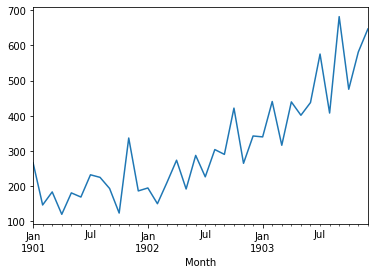

In [2]:
import pandas as pd
import matplotlib.pyplot  as plt
 
def parser(x):
	return pd.datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/shampoo_sales.csv', 
                     header=0, parse_dates=[0], index_col=0, 
                     squeeze=True, date_parser=parser)
print(series.head())
series.plot()
plt.show()

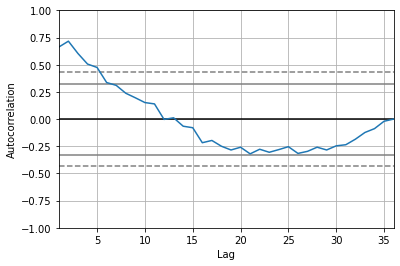

In [3]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Fri, 16 Oct 2020   AIC                            406.340
Time:                        21:52:03   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

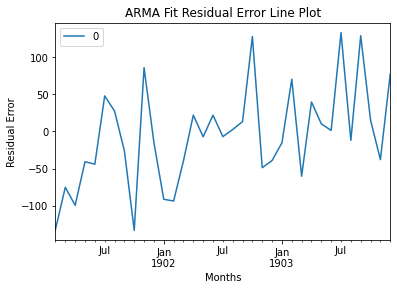

In [4]:
# importing arima library
from statsmodels.tsa.arima_model import ARIMA


model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARMA Fit Residual Error Line Plot')
plt.xlabel('Months')
plt.ylabel('Residual Error')
plt.show()

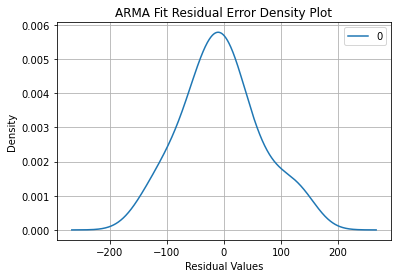

                0
count   35.000000
mean    -5.495267
std     68.132879
min   -133.296649
25%    -42.477975
50%     -7.186677
75%     24.748283
max    133.237923


In [5]:
residuals.plot(kind='kde')
plt.title('ARMA Fit Residual Error Density Plot')
plt.xlabel('Residual Values')
plt.grid()
plt.show()
print(residuals.describe())

predicted=349.117705, expected=342.300000
predicted=306.512977, expected=339.700000
predicted=387.376388, expected=440.400000
predicted=348.154194, expected=315.900000
predicted=386.308770, expected=439.300000
predicted=356.081960, expected=401.300000
predicted=446.379501, expected=437.400000
predicted=394.737276, expected=575.500000
predicted=434.915504, expected=407.600000
predicted=507.923350, expected=682.000000
predicted=435.482832, expected=475.300000
predicted=652.743765, expected=581.300000
predicted=546.343452, expected=646.900000


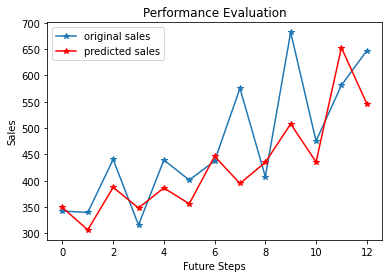

In [6]:
from sklearn.metrics import mean_squared_error
 

X = series.values
size = int(len(X) * 0.66)


train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []


for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
    




# plot
plt.plot(test, label = 'original sales', marker = '*')
plt.plot(predictions, color='red', label = 'predicted sales', marker = '*')
plt.title('Performance Evaluation')
plt.xlabel('Future Steps')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [7]:
import math
error = mean_squared_error(test, predictions)
print('Test Root Mean Squared Error: %.3f' % math.sqrt(error))

Test Root Mean Squared Error: 83.417
